# Joplin Project

<img src="Image/Joplin.jpg" style="width: 700px;"/>

<font size="3"> Data source: 
<ul>
    <li> Housing Unit Inventory of Joplin, MO: document id in INCORE "5dc1c196b9219c06dd2e3f0b". </li> <br>
    <li> Joplin Block Group Data: document id in INCORE "5d4c9680b9219c0689b235db" </li> <br>
    <li> Joplin building Inventory data: document id in INCORE "5dbc7a2ab9219c06dd242aca"</li>
</ul>
</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
#from folium.plugins import FastMarkerCluster
#import geopandas as gpd
#import folium
from texttable import Texttable
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [4]:
#load data
builing_inv = pd.read_csv("building_inventory_corrected.csv")
HUA_inv = pd.read_csv("IN-CORE_2ev2_housingunitallocation_1238.csv")

In [5]:
builing_inv.columns

Index(['strctid', 'parid', 'blockid', 'blockidstr', 'statefp10', 'countyfp10',
       'tractce10', 'pumgeoid10', 'pumname10', 'plcgeoid10', 'plcname10',
       'address1', 'house_no', 'archtype', 'objectid', 'parid_card', 'bldg_id',
       'year_built', 'gsq_foot', 'appr_bldg', 'repl_cst', 'str_cst',
       'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility',
       'dwell_unit', 'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'LON', 'LAT',
       'geometry', 'bldpnt4326', 'bply4326', 'gsq_meter', 'aprbldg', 'aprland',
       'aprtot', 'yrblt', 'huestimate', 'd_sf'],
      dtype='object')

### Joplin Residential buildings summary

<font size="3"> 
    There are two types of residential structures in Joplin bulding inventory. Structure Type 1 represents Single family building and Structure Type 5 represents Multi-family structure. Structure Type 1 and Structure Type 5 are all wood frame buildings.
 </font>

<table><tr>
<td> <img src="Image/archtype1.jpg" style="width: 400px;"/> </td>
<td> <img src="Image/archtype5.jpg" style="width: 400px;"/> </td>
</tr></table>


<font size="2"> Masoomi, H., Ameri, M. R. & van de Lindt, J. W. (2018), Wind Performance Enhancement Strategies for Residential Wood-Frame Buildings, Journal of Performance of Constructed Facilities, 32(3)
 </font>

In [6]:
# In Joplin Building inventory dataset, single family structure is 'archtype' 1, 
# multi-family is 'archtype' 5. 
Building_res = builing_inv[(builing_inv['archtype'] == 1) | (builing_inv['archtype'] == 5)]

In [7]:
# select variables for anaysis
Building_res = Building_res[['strctid','blockid','archtype','year_built','appr_bldg','LON', 'LAT',
       'geometry']]

In [8]:
# Handling missingness in building inventory dataset
Building_res['year_built'] = Building_res['year_built'].fillna(method='ffill')
Building_res['appr_bldg'] = Building_res['appr_bldg'].fillna(Building_res['appr_bldg'].mean())

In [9]:
table = Building_res.pivot_table(index='archtype',values=['strctid','blockid'],aggfunc='nunique')
table_title = 'Table 1. Joplin Residential Buildings Summary'

table.style.set_caption(table_title)

,archtype,blockid,strctid
archtype,,,
1,1,1564,24392
5,1,98,464


In [10]:
# total blocks associated with residential buildings
len(set(Building_res['blockid']))

1579

<font size="4"> There are 24,856 residential builings (single-family and multi-family structure) associated 1,579 block groups in Joplin. The total number of single family structure is 24,392 located in 1,564 block groups . Total  464 multi-family buildings are located in 98 block groups. 

</font>

### Joplin Residential Buidlings Age Statistics

In [11]:
# buildling data source is from census 2010. Calculate the buildings ages
Building_res['Age'] = 2010 - Building_res['year_built']

In [12]:
Buildings_Ages = Texttable()
header_Ages = [ "Items","Values"]
#values_data = [Building_res["appr_bldg"].mean(),Building_res["appr_bldg"].std(),Building_res["appr_bldg"].median()]
Buildings_Ages.add_row(header_Ages)
Buildings_Ages.add_row(["Mean",Building_res["Age"].mean()])
Buildings_Ages.add_row(["Standard Deviation",Building_res["Age"].std()])
Buildings_Ages.add_row(["Median",Building_res["Age"].median()])
Buildings_Ages.add_row(["Max",Building_res["Age"].max()])
Buildings_Ages.add_row(["Min",Building_res["Age"].min()])
print(Buildings_Ages.draw())

+--------------------+--------+
| Items              | Values |
+--------------------+--------+
| Mean               | 60.501 |
+--------------------+--------+
| Standard Deviation | 37.693 |
+--------------------+--------+
| Median             | 60     |
+--------------------+--------+
| Max                | 2010   |
+--------------------+--------+
| Min                | 0      |
+--------------------+--------+


Text(0.5, 1.0, 'Joplin Residential Buildings Ages Distribution')

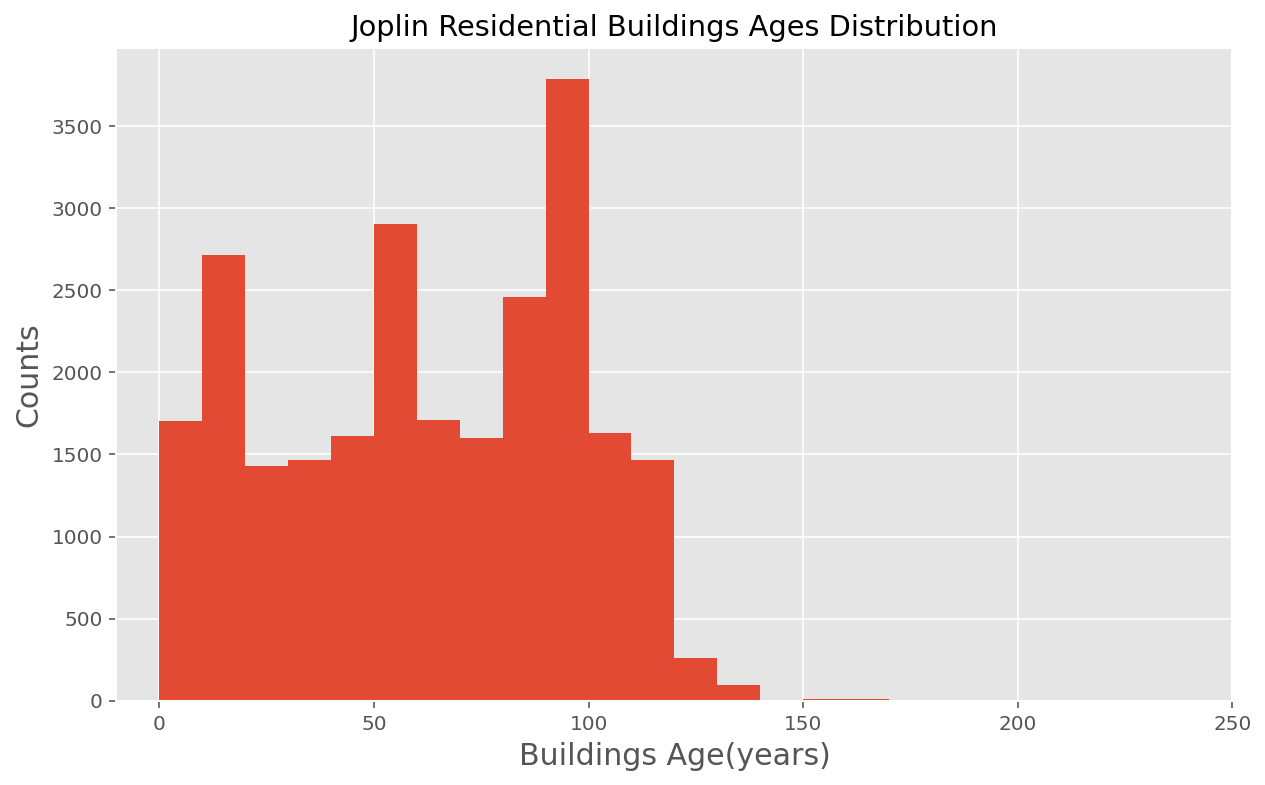

In [13]:
w = 10
n = math.ceil((Building_res["Age"].max()-Building_res["Age"].min())/w)

plt.figure(figsize=(10,6))
plt.hist(Building_res["Age"],bins = n)
plt.xlim(-10,250)
plt.ylabel("Counts",fontsize = 15)
plt.xlabel("Buildings Age(years)",fontsize = 15)
plt.title("Joplin Residential Buildings Ages Distribution")

### Joplin Residential Buildings Appraisal Values Statistics

In [16]:
# total property values of Joplin residential buildings
Building_res["appr_bldg"].sum().astype('int64')

2165865975

In [18]:
Buildings_Values = Texttable()
header_values = [ "Items","Values"]
#values_data = [Building_res["appr_bldg"].mean(),Building_res["appr_bldg"].std(),Building_res["appr_bldg"].median()]
Buildings_Values.add_row(header_values)
Buildings_Values.add_row(["Mean",Building_res["appr_bldg"].mean()])
Buildings_Values.add_row(["Standard Deviation",Building_res["appr_bldg"].std()])
Buildings_Values.add_row(["Median",Building_res["appr_bldg"].median()])
Buildings_Values.add_row(["Max",Building_res["appr_bldg"].max()])
Buildings_Values.add_row(["Min",Building_res["appr_bldg"].min()])
print(Buildings_Values.draw())

+--------------------+------------+
| Items              | Values     |
+--------------------+------------+
| Mean               | 87136.546  |
+--------------------+------------+
| Standard Deviation | 199571.854 |
+--------------------+------------+
| Median             | 61935      |
+--------------------+------------+
| Max                | 5696300    |
+--------------------+------------+
| Min                | 0          |
+--------------------+------------+


Text(0.5, 1.0, 'Joplin Residential Buildings Appraisal Values Distribution')

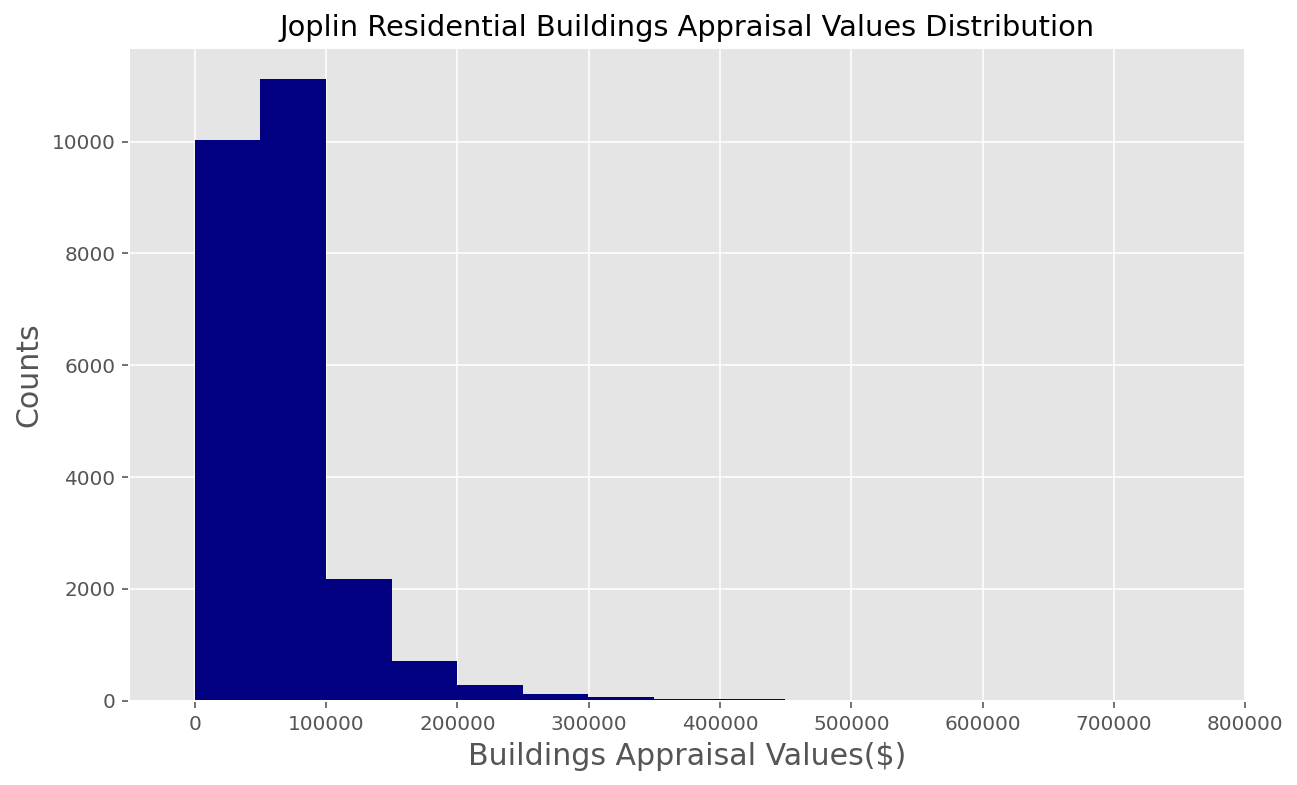

In [19]:
w = 50000
n = math.ceil((Building_res["appr_bldg"].max()-Building_res["appr_bldg"].min())/w)

plt.figure(figsize=(10,6))
plt.hist(Building_res["appr_bldg"],color = "navy",bins = n)
plt.xlim(-50000,800000)
plt.ylabel("Counts",fontsize = 15)
plt.xlabel("Buildings Appraisal Values($)",fontsize = 15)
plt.title("Joplin Residential Buildings Appraisal Values Distribution")

### Joplin Population summary

In [20]:
# Dataset information
HUA_inv.columns

Index(['strctid', 'statefp10', 'tractce10', 'pumgeoid10', 'pumname10',
       'address1', 'house_no', 'parid_card', 'struct_typ', 'str_prob',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'aprland',
       'aprtot', 'addrptid', 'residential', 'bldgobs', 'flag_ap', 'x', 'y',
       'ap4326', 'yrblt', 'aprbldg', 'plcname10', 'blockid', 'countyfp10',
       'huestimate', 'geometry', 'blockidstr', 'archtype', 'parid',
       'plcgeoid10', 'randomap', 'randommergeorder', 'huid', 'FIPScounty',
       'serialno', 'livetype', 'numprec', 'gqpop', 'ownershp', 'race',
       'hispan', 'hispan_flag', 'vacancy', 'gqtype', 'bgid', 'randomhu',
       'aphumerge'],
      dtype='object')

In [21]:
HUA_inv = HUA_inv[['addrptid','numprec','vacancy','strctid','bgid','blockid']]

<font size="3"> 
    The Housing Unit inventory dataset includes the data examples from Jasper and Newtons counties. However, the building inventory only covers Joplin area. 

</font>

In [22]:
# merge HUA(housing unit allocation dataset) with Joplin building inventory
# Building inventory dataset only inlcuded the buildings information of Joplin and some area around Joplin
popu_joplin= Building_res.merge(HUA_inv,on="strctid")

In [23]:
popu_joplin.columns

Index(['strctid', 'blockid_x', 'archtype', 'year_built', 'appr_bldg', 'LON',
       'LAT', 'geometry', 'Age', 'addrptid', 'numprec', 'vacancy', 'bgid',
       'blockid_y'],
      dtype='object')

In [24]:
print("Total population in Joplin areas are ",popu_joplin['numprec'].sum().astype('int64'))

Total population in Joplin areas are  52561
